In [47]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO
import requests

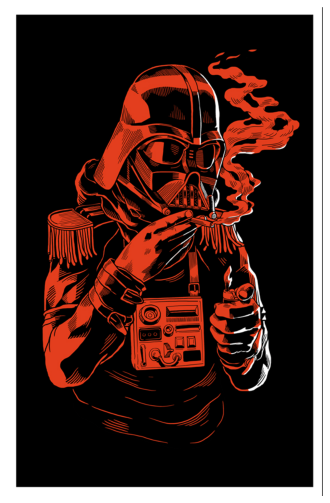

In [48]:
url = "https://i.pinimg.com/originals/d4/93/32/d493326488fc5b3c1814aceb3bd544e1.png"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert()
img_array = np.asarray(image)


plt.figure(figsize=(15, 9))
plt.imshow(img_array)
plt.axis('off')
plt.show()

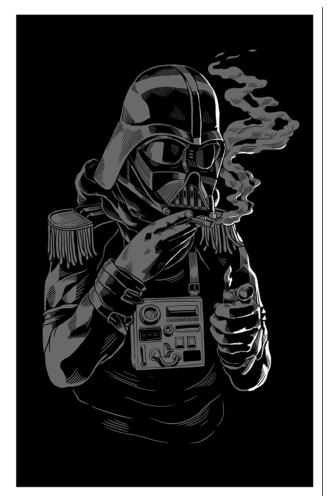

In [50]:
img_arr = np.copy(image)
img_gray_average = np.mean(img_arr, axis=2) 

# img_gray_average
plt.figure(figsize=(15, 9))
plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()



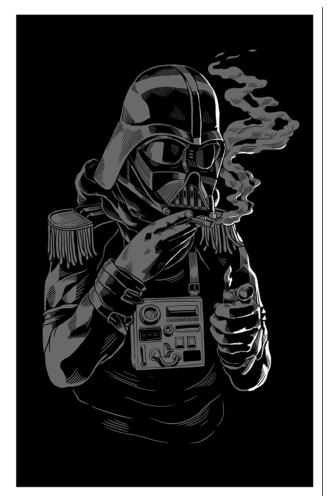

In [51]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)
new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

plt.figure(figsize=(15, 9))
plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
img_gray_average.shape

(960, 620)

## Aplicação do _luminance perception_

$ Y_{linear} = 0.2126R_{linear} + 0.7152G_{linear} + 0.0722B_{linear}$

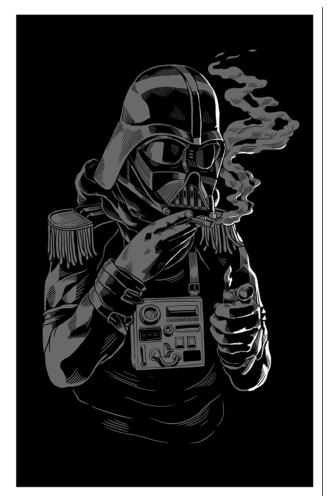

In [52]:
pesos = [0.2126, 0.7152, 0.0722]

res = np.array(img_arr * pesos, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)



plt.figure(figsize=(15, 9))
plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()

#Compressão Gamma
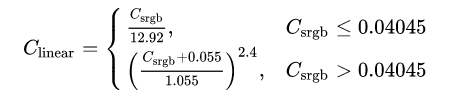

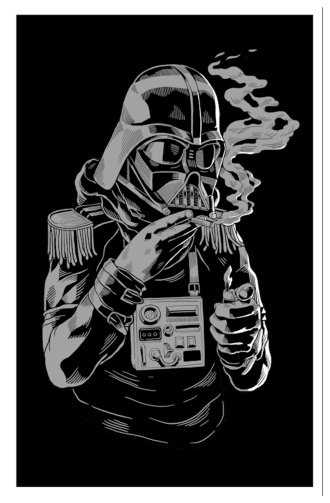

In [53]:
gamma_compression = y.copy()
gamma_compression = 255 * ((y / 255) ** (1 / 2.2))

plt.figure(figsize=(15, 9))
plt.imshow(gamma_compression, cmap='gray')
plt.axis('off')
plt.show()

# Aproximação Linear
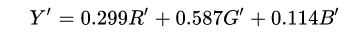


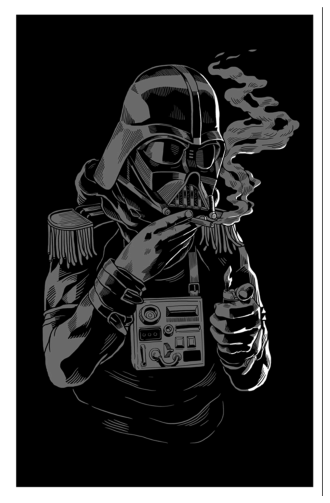

In [40]:
pesos = [0.299, 0.587, 0.114]
res = np.array(img_array * pesos, dtype=np.uint8)
linear_approximation = np.array(np.sum(res, axis=2), dtype=np.uint8)

plt.figure(figsize=(15,9))
plt.imshow(linear_approximation, cmap="gray")
plt.axis('off')
plt.show()

#COMPARE

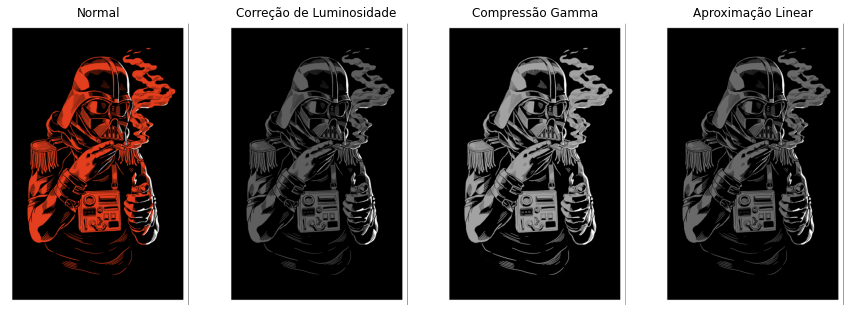

In [59]:
fig, (image, lum, gamma, linear) = plt.subplots(1, 4, figsize=(15,9))

image.imshow(img_array)
image.set_title('Normal')
image.axis('off')

lum.imshow(y, cmap='gray')
lum.set_title('Correção de Luminosidade')
lum.axis('off')

gamma.imshow(gamma_compression, cmap='gray')
gamma.set_title('Compressão Gamma')
gamma.axis('off')

linear.imshow(linear_approximation, cmap='gray')
linear.set_title('Aproximação Linear')
linear.axis('off')

plt.show()